### 1. Install R packages

Uncomment section below if running for the first time

In [2]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("dada2")
install.packages("magrittr")
install.packages("stringr")
install.packages("data.table")
install.packages("broom")
install.packages("qualpalr")
install.packages("seqinr")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.18), R 4.1.2 (2021-11-01)

Installing package(s) 'dada2'

also installing the dependencies ‘deldir’, ‘jpeg’, ‘interp’, ‘Rsamtools’, ‘GenomicAlignments’, ‘hwriter’, ‘latticeExtra’, ‘Rhtslib’, ‘ShortRead’, ‘RcppParallel’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'aplot', 'BiocManager', 'brew', 'car', 'cli', 'commonmark',
  'cpp11', 'crayon', 'curl', 'data.table', 'datawizard', 'devtools', 'digest',
  'DT', 'e1071', 'evaluate', 'flextable', 'fontawesome', 'foreign', 'gert',
  'ggforce', 'ggsignif', 'heatmaply', 'igraph', 'insight', 'isoband',
  'jsonlite', 'lifecycle', 'maps', 'maptools', 'markdown', 'mclust', 'mgcv',
  'minqa', 'mnormt', 'network', 'nlme', 'nnet', 'openssl', 'openxlsx',
  'pbdZMQ', 'pcaPP', 'pkgload', 'polyclip',

### 2. Load required libraries

In [2]:
library(dada2, warn.conflicts = F, quietly = T)
library(stringr, warn.conflicts = F, quietly = T)
library(data.table, warn.conflicts = F, quietly = T)
library(qualpalr, warn.conflicts = F, quietly = T)
library(ShortRead, warn.conflicts = F, quietly = T)
library(Biostrings, warn.conflicts = F, quietly = T)
library(seqinr, warn.conflicts = F, quietly = T)


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following objects are masked from ‘package:base’:

    expand.grid, I, unname



Attaching package: ‘IRanges’


The following object is masked from ‘package:data.table’:

    shift



Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Warning message:
“pack

In [3]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS/LAPACK: /Users/mann/miniconda3/envs/2022-ADS_plaque-R/lib/libopenblasp-r0.3.20.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] seqinr_4.2-16               ShortRead_1.52.0           
 [3] GenomicAlignments_1.30.0    SummarizedExperiment_1.24.0
 [5] Biobase_2.54.0              MatrixGenerics_1.6.0       
 [7] matrixStats_0.62.0          Rsamtools_2.10.0           
 [9] GenomicRanges_1.46.1        Biostrings_2.62.0          
[11] GenomeInfoDb_1.30.1         XVector_0.34.0             
[13] IRanges_2.28.0              S4Vectors_0.32.4           
[15] BiocParallel_1.28.3         BiocGenerics_0.40.0        
[17] qualpalr_0.4.3              data.table_1.14.4          
[19] stringr

### 3. File path setup

In [3]:
rawpath <- "raw"
wdpath <- "/Users/mann/github/ads_plaque/04-rpoC_processing/" # change to where git repository was cloned
fnFs <- sort(list.files(rawpath, pattern="_R1_001.fastq.gz", full.names=T))
fnRs <- sort(list.files(rawpath, pattern="_R2_001.fastq.gz", full.names=T))
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)
head(sample.names, 50)
paste("Number of input samples: ", length(sample.names))

[1] "UF102PFR" "UF106PFR" "UF10PD"   "UF115PD"  "UF12PD"   "UF13PF"  
 [7] "UF14PF"   "UF15PD"   "UF17PF"   "UF20PD"   "UF21PD"   "UF22PF"  
[13] "UF23PF"   "UF24PF"   "UF25PD"   "UF25PER"  "UF26PD"   "UF26PF"  
[19] "UF27PF"   "UF30PF"   "UF31PFR"  "UF32PF"   "UF33PF"   "UF35PFR" 
[25] "UF36PER"  "UF36PF"   "UF39PD"   "UF40PFR"  "UF42PD"   "UF42PER" 
[31] "UF43PD"   "UF44PD"   "UF46PD"   "UF47PD"   "UF47PER"  "UF48PF"  
[37] "UF49PD"   "UF49PDR"  "UF49PER"  "UF49PFR"  "UF50PER"  "UF51PD"  
[43] "UF52PD"   "UF52PDR"  "UF52PER"  "UF53PD"   "UF53PDR"  "UF53PER" 
[49] "UF53PFR"  "UF54PD"

[1] "Number of input samples:  71"

### 4. Plot quality scores

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


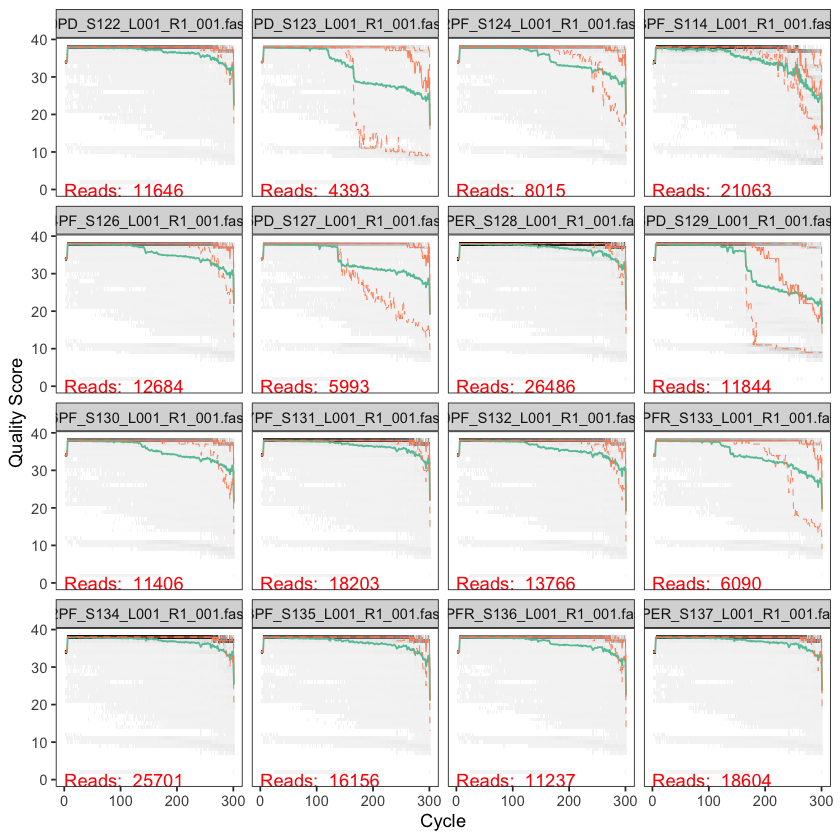

pdf 
  2

pdf 
  2

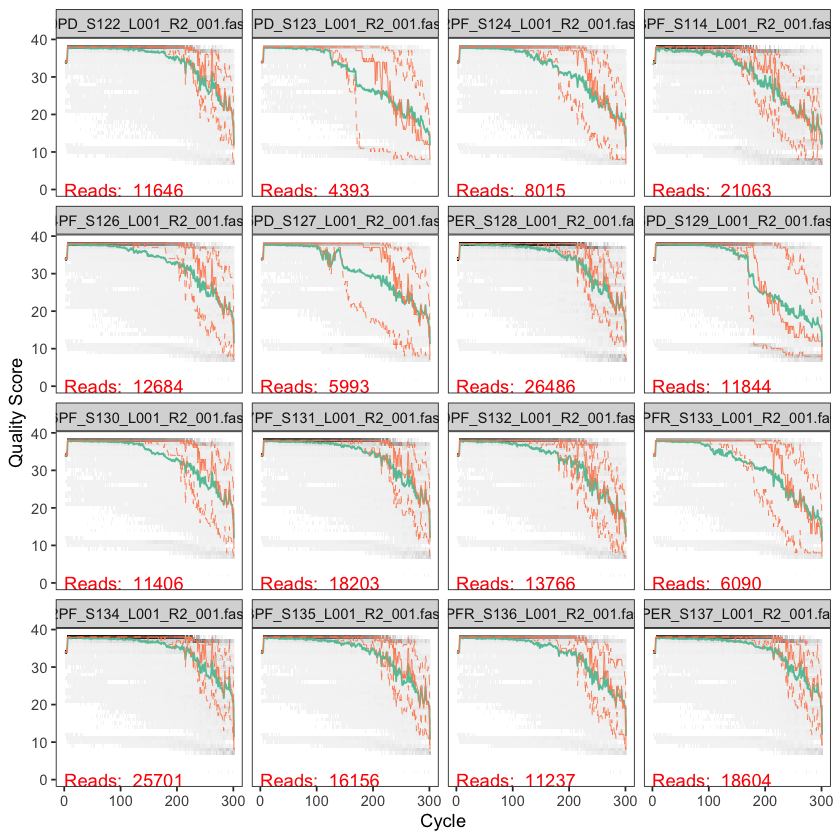

In [4]:
system("mkdir img") # ignore warning
fwdqual <- plotQualityProfile(fnFs[10:25])
revqual <- plotQualityProfile(fnRs[10:25])
fwdqual
revqual

pdf(paste(wdpath, "img/", "forward_quality_plot.pdf", sep=""))
fwdqual
dev.off()
pdf(paste(wdpath, "img/", "reverse_quality_plot.pdf", sep=""))
revqual
dev.off()


### 5. Preliminary filter (removes sequences with uncalled bases)

In [5]:
fnFs.filtN <- file.path(rawpath, "filtN", basename(fnFs)) # Put N-filtered files in filtN/ subdirectory
fnRs.filtN <- file.path(rawpath, "filtN", basename(fnRs))
filterAndTrim(fnFs, fnFs.filtN, fnRs, fnRs.filtN, maxN = 0, multithread = TRUE, compress = TRUE)

Creating output directory: raw/filtN



### 6. Primer removal 

In [6]:
cutadapt <- as.character(system("which cutadapt", intern=T))
cutadapt
system("cutadapt --version")
path.cut <- file.path(rawpath, "cutadapt")
if(!dir.exists(path.cut)) dir.create(path.cut)
fnFs.cut <- file.path(path.cut, basename(fnFs))
fnRs.cut <- file.path(path.cut, basename(fnRs))
FWD.RC <- dada2:::rc("MAYGARAARMGNATGYTNCARGA")
REV.RC <- dada2:::rc("GMCATYTGRTCNCCRTCRAA")
# Trim FWD and the reverse-complement of REV off of R1 (forward reads)
R1.flags <- paste("-g", "MAYGARAARMGNATGYTNCARGA", "-a", REV.RC) 
# Trim REV and the reverse-complement of FWD off of R2 (reverse reads)
R2.flags <- paste("-G", "GMCATYTGRTCNCCRTCRAA", "-A", FWD.RC) 
for(i in seq_along(fnFs)) {
  system2(cutadapt, args = c("--cores=0", R1.flags, R2.flags, "-n", 2,"-o", fnFs.cut[i], "-p", fnRs.cut[i], fnFs.filtN[i], fnRs.filtN[i]))
}
cutFs <- sort(list.files(path.cut, pattern = "R1", full.names = TRUE))
cutRs <- sort(list.files(path.cut, pattern = "R2", full.names = TRUE))

[1] "/Users/mann/miniconda3/envs/2022-ADS_plaque_diffAbund/bin/cutadapt"

### 7. Filter and trim reads

In [7]:
filtFs <- file.path(path.cut, "filtered", basename(cutFs))
filtRs <- file.path(path.cut, "filtered", basename(cutRs))
out <- filterAndTrim(cutFs, filtFs, cutRs, filtRs, trimRight=25, maxN=c(0,0), maxEE=c(4,6), rm.phix=TRUE, matchIDs=TRUE, compress=TRUE, multithread=TRUE)
retained <- as.data.frame(out)
retained$percentage_retained <- retained$reads.out/retained$reads.in*100
retained

Creating output directory: raw/cutadapt/filtered



,reads.in,reads.out,percentage_retained
,<dbl>,<dbl>,<dbl>
UF102PFR_S113_L001_R1_001.fastq.gz,3384,2900,85.69740
UF106PFR_S114_L001_R1_001.fastq.gz,11281,9623,85.30272
UF10PD_S115_L001_R1_001.fastq.gz,5839,5510,94.36547
UF115PD_S116_L001_R1_001.fastq.gz,24981,23984,96.00897
UF12PD_S117_L001_R1_001.fastq.gz,3843,3355,87.30159
UF13PF_S118_L001_R1_001.fastq.gz,5618,5339,95.03382
UF14PF_S119_L001_R1_001.fastq.gz,6886,6404,93.00029
UF15PD_S120_L001_R1_001.fastq.gz,3622,3158,87.18940
UF17PF_S121_L001_R1_001.fastq.gz,7016,5278,75.22805


### 8. Learn and plot error rates

106986664 total bases in 479494 reads from 30 samples will be used for learning the error rates.
102444347 total bases in 439442 reads from 32 samples will be used for learning the error rates.


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


pdf 
  2

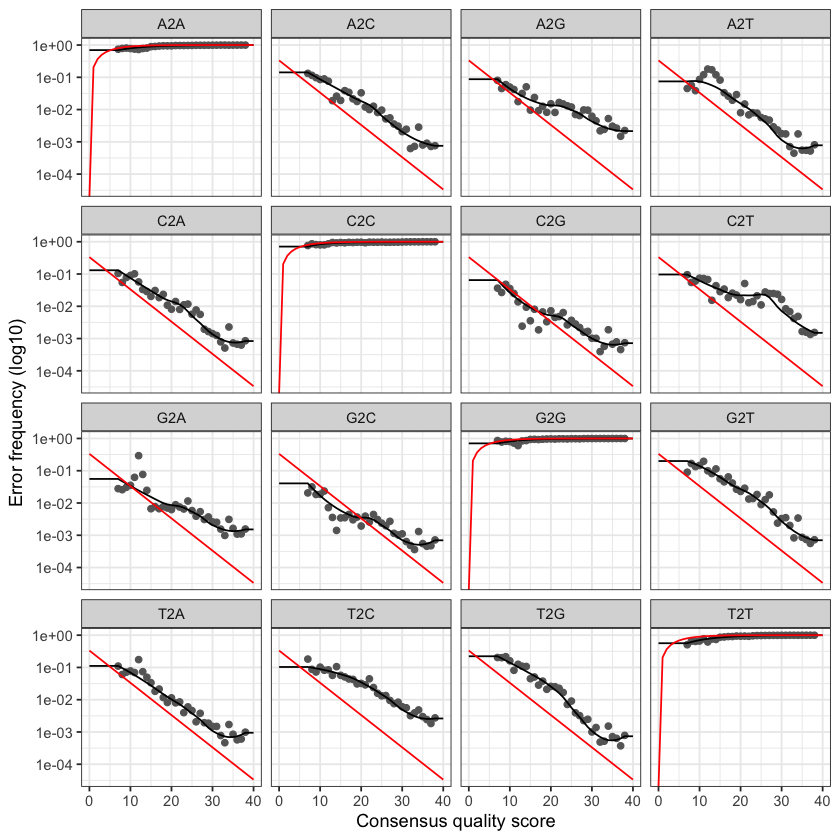

In [8]:
set.seed(12349)
errF <- learnErrors(filtFs, multithread=T, random=T)
errR <- learnErrors(filtRs, multithread=T, random=T)
err.f.plt <- plotErrors(errF, nominalQ=TRUE) 
err.f.plt
pdf(paste(wdpath, "img/", "error_plot.pdf", sep=""))
err.f.plt
dev.off()

### 9. Dereplication

In [9]:
derepFs <- derepFastq(filtFs, verbose=TRUE)
derepRs <- derepFastq(filtRs, verbose=TRUE)
# reassign sample names
sample.names <- sapply(strsplit(basename(filtFs), "_"), `[`, 1)
names(derepFs) <- sample.names
names(derepRs) <- sample.names

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF102PFR_S113_L001_R1_001.fastq.gz

Encountered 808 unique sequences from 2900 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF106PFR_S114_L001_R1_001.fastq.gz

Encountered 3056 unique sequences from 9623 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF10PD_S115_L001_R1_001.fastq.gz

Encountered 1818 unique sequences from 5510 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF115PD_S116_L001_R1_001.fastq.gz

Encountered 6743 unique sequences from 23984 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF12PD_S117_L001_R1_001.fastq.gz

Encountered 1103 unique sequences from 3355 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF13PF_S118_L001_R1_001.fastq.gz

Encountered 1681 unique sequences from 5339 tota

Encountered 1146 unique sequences from 3309 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF54PD_S104_L001_R1_001.fastq.gz

Encountered 992 unique sequences from 3260 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF54PER_S164_L001_R1_001.fastq.gz

Encountered 14673 unique sequences from 67125 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF55PF_S109_L001_R1_001.fastq.gz

Encountered 5407 unique sequences from 24277 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF56PFR_S166_L001_R1_001.fastq.gz

Encountered 5441 unique sequences from 21824 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF58PD_S102_L001_R1_001.fastq.gz

Encountered 1690 unique sequences from 5643 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF59PD_S112_L00

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF39PD_S139_L001_R2_001.fastq.gz

Encountered 1947 unique sequences from 4126 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF40PFR_S140_L001_R2_001.fastq.gz

Encountered 4142 unique sequences from 7980 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF42PD_S141_L001_R2_001.fastq.gz

Encountered 1448 unique sequences from 3500 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF42PER_S142_L001_R2_001.fastq.gz

Encountered 13627 unique sequences from 27058 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF43PD_S143_L001_R2_001.fastq.gz

Encountered 2097 unique sequences from 3237 total sequences read.

Dereplicating sequence entries in Fastq file: raw/cutadapt/filtered/UF44PD_S111_L001_R2_001.fastq.gz

Encountered 15789 unique sequences from 24848 tot

### 10. Sample inference

In [10]:
dadaFs <- dada(derepFs, err=errF, multithread=TRUE)
dadaRs <- dada(derepRs, err=errR, multithread=TRUE)

Sample 1 - 2900 reads in 808 unique sequences.
Sample 2 - 9623 reads in 3056 unique sequences.
Sample 3 - 5510 reads in 1818 unique sequences.
Sample 4 - 23984 reads in 6743 unique sequences.
Sample 5 - 3355 reads in 1103 unique sequences.
Sample 6 - 5339 reads in 1681 unique sequences.
Sample 7 - 6404 reads in 2162 unique sequences.
Sample 8 - 3158 reads in 1015 unique sequences.
Sample 9 - 5278 reads in 1662 unique sequences.
Sample 10 - 11194 reads in 3199 unique sequences.
Sample 11 - 3319 reads in 804 unique sequences.
Sample 12 - 7222 reads in 2030 unique sequences.
Sample 13 - 17007 reads in 5196 unique sequences.
Sample 14 - 11215 reads in 3652 unique sequences.
Sample 15 - 4286 reads in 1574 unique sequences.
Sample 16 - 25306 reads in 7287 unique sequences.
Sample 17 - 10868 reads in 1984 unique sequences.
Sample 18 - 9930 reads in 3062 unique sequences.
Sample 19 - 17078 reads in 4747 unique sequences.
Sample 20 - 12259 reads in 3620 unique sequences.
Sample 21 - 4862 reads 

### 11. Merge paired-end reads

In [11]:
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=T)

2616 paired-reads (in 52 unique pairings) successfully merged out of 2809 (in 56 pairings) input.

9262 paired-reads (in 161 unique pairings) successfully merged out of 9362 (in 182 pairings) input.

5185 paired-reads (in 83 unique pairings) successfully merged out of 5341 (in 96 pairings) input.

23247 paired-reads (in 250 unique pairings) successfully merged out of 23446 (in 301 pairings) input.

3111 paired-reads (in 57 unique pairings) successfully merged out of 3272 (in 62 pairings) input.

5099 paired-reads (in 86 unique pairings) successfully merged out of 5150 (in 96 pairings) input.

6065 paired-reads (in 92 unique pairings) successfully merged out of 6204 (in 105 pairings) input.

3041 paired-reads (in 66 unique pairings) successfully merged out of 3085 (in 73 pairings) input.

4989 paired-reads (in 83 unique pairings) successfully merged out of 5155 (in 99 pairings) input.

10612 paired-reads (in 116 unique pairings) successfully merged out of 11069 (in 130 pairings) input.


### 12. Construct sequence table

In [12]:
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

Duplicate sequences detected and merged.



[1]   71 6387

### 13. Length filter

In [13]:
table(nchar(colnames(seqtab)))


  62   63   64   66   67   68   69   70   71   72   73   74   75   76   77   78 
   4   11    5    6   14    8    2   10    2   16    9    8    4   13    8   11 
  79   80   81   82   83   84   85   86   87   88   89   90   91   92   93   94 
  10   10    5    9    4    7   18    7    6   16   12    3   21    6   17   12 
  95   96   97   98   99  100  101  102  103  104  105  106  107  108  109  110 
   3    6    3    9    5    7    3    3    7    4   13    3    3    9    5    4 
 111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126 
   8   11    8   13   17    6    4    7    5    2    6    4   20   20    5    2 
 127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142 
  14   15    5   13    2    4    6    6    2    8   10   10   13    8    9   11 
 143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158 
   3    4    5    3    4   14    6    4   13    6    4    2    3    6   10    8 
 159  160  161  162  163  1

Filter out any ASVs that are shorter than 450 bp in length

In [14]:
seqlens <- nchar(getSequences(seqtab))
seqtab.filt <- seqtab[,seqlens >= 450]
dim(seqtab.filt)

[1]   71 4679

### 14. Sequence length distribution post filter

pdf 
  2

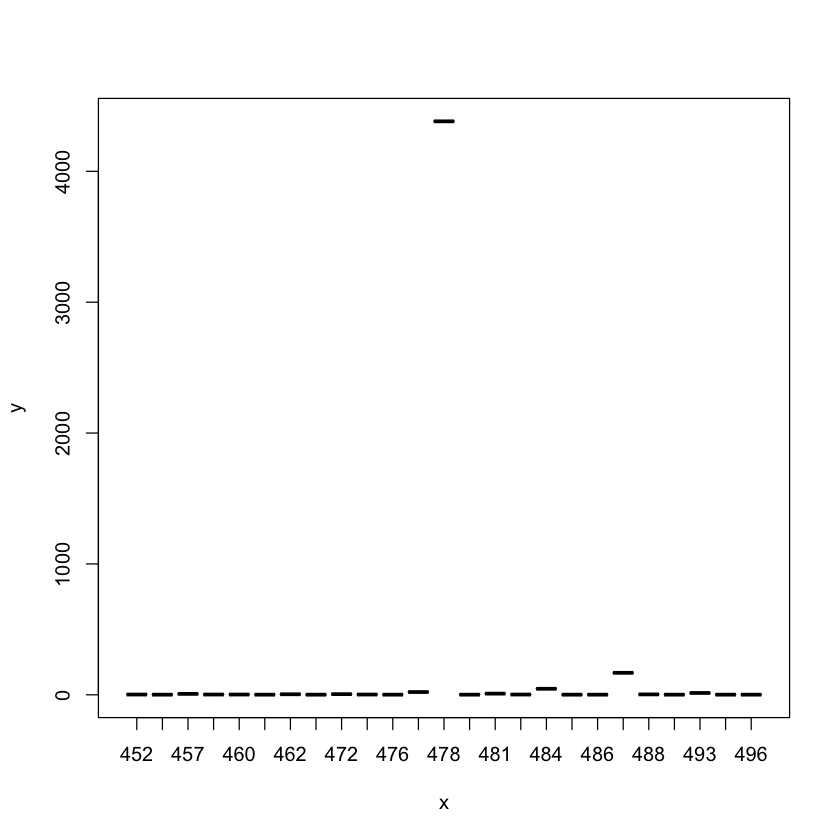

In [15]:
length.histogram <- as.data.frame(table(nchar(getSequences(seqtab.filt))))
plot(x=length.histogram[,1], y=length.histogram[,2])
pdf(paste(wdpath, "img/", "length_hist.pdf", sep=""))
plot(x=length.histogram[,1], y=length.histogram[,2])
dev.off()

### 15. Remove chimeras

In [16]:
seqtab.nochim <- removeBimeraDenovo(seqtab.filt, method="pooled", multithread=T, verbose=T)
dim(seqtab.nochim)
sum(seqtab.nochim)/sum(seqtab.filt)

Identified 752 bimeras out of 4679 input sequences.



[1]   71 3927

[1] 0.9651249

### 16. Processing summary

In [17]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nochimeras")
rownames(track) <- sample.names
track

Duplicate sequences detected and merged.



,input,filtered,denoisedF,denoisedR,merged,nochimeras
UF102PFR,3384,2900,2846,2844,2616,2113
UF106PFR,11281,9623,9484,9458,9262,8385
UF10PD,5839,5510,5421,5359,5185,4600
UF115PD,24981,23984,23638,23594,23247,21512
UF12PD,3843,3355,3317,3278,3111,2986
UF13PF,5618,5339,5277,5167,5099,4707
UF14PF,6886,6404,6300,6262,6065,5814
UF15PD,3622,3158,3105,3123,3041,2472
UF17PF,7016,5278,5214,5184,4989,4201
UF20PD,11629,11194,11135,11093,10612,9828


### 17. Save output

In [18]:
write.table(data.frame("row_names"=rownames(track),track),"read_retention.txt", row.names=FALSE, quote=F, sep="\t")
uniquesToFasta(seqtab.nochim, "rep_set.fa")
system("awk '/^>/{print \">ASV\" ++i; next}{print}' < rep_set.fa > rep_set_fix.fa")
system("mv rep_set_fix.fa rep_set.fa")

### 18. Clean up ASV names

In [19]:
my_otu_table <- t(as.data.frame(seqtab.nochim)) 
ASV.seq <- as.character(unclass(row.names(my_otu_table))) 
ASV.num <- paste0("ASV", seq(ASV.seq), sep='') 
colnames(seqtab.nochim) <- ASV.num 
write.table(data.frame("row_names"=rownames(seqtab.nochim),seqtab.nochim),"sequence_table.merged.txt", row.names=FALSE, quote=F, sep="\t")